In [206]:
import arabic_reshaper
from Utils import load_csv_dataset,construct_count_array, load_model
from ConfigParser import ConfigsLoader
from Models.DeepCLCNN import DeepCLCNN
from Models.DeepCLCNNwithWL import  DeepCLCNNwithWL
from Models.DeepNoPoolingCLCNN import  DeepNoPoolingCLCNN
from Models.DeepNoPoolingCLCNNwithWT import DeepNoPoolingCLCNNwithWT
from Models.DeepCLCNNNoEncoder import DeepCLCNNNoEncoder
from Models.DeepCLCNNwithWLNoEncoder import DeepCLCNNwithWLNoEncoder
from Models.DeepNoPoolingCLCNNNoEncoder import DeepNoPoolingCLCNNNoEncoder
from Models.DeepNoPoolingCLCNNwithWTNoEncoder import DeepNoPoolingCLCNNwithWTNoEncoder
from DatasetLoaderFactory import ObjectFactory, WikipediaTitleDatasetLoader, PoetryDatasetLoader, DialectDatasetLoader
import numpy as np
from Transformations import TextProcessor
import torch.nn as nn
from PIL import (
    Image,
    ImageDraw,
    ImageFont,
)
import matplotlib.pyplot as plt
import torch
from sklearn.neighbors import NearestNeighbors
from pprint import pprint
from sklearn.manifold import TSNE

from matplotlib.offsetbox import (
    OffsetImage,
    AnnotationBbox
)



In [207]:
sentence = """
تتمحور المسيحية في تعاليمها حول الكتاب المقدس، وبشكل خاص يسوع، الذي هو في العقيدة متمم النبؤات المنتظر، وابن الله المتجسد؛ الذي قدّم في العهد الجديد ذروة التعاليم الاجتماعية والأخلاقية، وأيّد أقواله بمعجزاته؛ وكان مخلّص العالم بموته وقيامته، والوسيط الوحيد بين الله والبشر؛ وينتظر معظم المسيحيين مجيئه الثاني، الذي يختم بقيامة الموتى، حيث يثيب الله الأبرار والصالحين بملكوت أبدي سعيد.

يؤمن المسيحيون أن يسوع هو حي في السماء، وأن جسده بحالة ممجدة فيها، وأنه سيعود في آخر الزمان ليقيم حكمًا ألفيًا يبلغ فيه الملكوت ذروته وينتهي بقيامة الموتى وانفتاح العالم المؤقت والفاني على الأبدية والخلود. هذا الملكوت، قد افتتح عن مجيء المسيح الأول وهو مستمر بأشكال جزئيّة داخل الكنيسة وخارجها، حتى تمام الاعتلان الإلهي في آخر الأزمنة. يعتقد المسيحيون أيضًا، أن يسوع هو بكر القائمين من بين الأموات، وقد عزّا بموته الإنسان وفتح أبواب الهاوية - وتترجم أيضًا القبر وهي مكان انتظار الأرواح بعد موتها - وبذلك غدا الإنسان بحالة روحية إما يتعذب تكفيرًا أو يتنعم اتحادًا مع الله فيما يشبه نعيم الأرواح، وهذا هو رأي الكنيسة الكاثوليكية وأغلب الكنائس البروتستانتية؛ وانطلاقًا من ذلك، يدعى المخلص، إذ به كما يقول الكتاب المقدس قد صالح الله البشرية مع نفسه، وألغى بقيامته المفاعيل الروحية لسقوط الإنسان، وأعاد بنوّة البشر لله، فيما يعرف بسر الفداء، أما المفاعيل الجسدية للسقوط أي الموت والألم والشر فستنتهي مع المجيء الثاني تزامنًا مع اكتمال البشرية التي أعدّها الله من قبل تأسيس العالم.

يظهر الثالوث مجتمعًا في مواضع عدة من العهد الجديد أشهرها عند عماد يسوع في متى 4/ 16-17 فبينما كان المسيح يعتمد هبط الروح القدس بشكل طائر الحمام في حين سمع صوت الآب من السماء. بعض المفسرين وآباء الكنيسة يشيرون إلى أن الثالوث الأقدس قد ذكر أيضًا في العهد القديم بشكل أو بآخر، كاستخدام لفظ الجمع ألوهيم للإشارة إلى الله، واستخدام الله لصيغة الجمع في اللغة العبرية للدلالة على ذاته ما يفترض وجود ثالوث.


الأقنوم الأول هو الآب ويمكن القول أنه الصورة التقليدية للالله، ويقدم الكتاب المقدس عددًا كبيرًا من صفاته. (انظر الثالوث الأقدس للاستزادة) أصل المصطلح يأتي من أن يسوع قد ناداه “الآب السماوي” وكذلك القديس بولس حين اعتبره “أب واحد لجميعنا.”[روما 15/8]

الأقنوم الثاني هو الابن ويطلق عليه أيضًا اسم الكلمة والحمل وهو: لم يعتبر مساواته بالله خلسة أو غنيمة يتمسك بها، بل أخلى ذاته متخذًا صورة عبد صائرًا شبيهًا بالبشر.[فيلمون 6/2] ودعي حين اتخذ جسدًا يسوع المسيح، وهو الذي تنبأ عنه جميع أنبياء العهد القديم من قبل. ألوهة يسوع يمكن استنباطها من مواضع عديدة في الكتاب المقدس، فهو قال في إنجيل يوحنا: أنا والآب واحد.[يوحنا 30/10] ومن رآه قد رأى الذي أرسله.[يوحنا 44/12] كذلك فإن أنبياء العهد القديم أشاروا إلى "التجسد الإلهي": يولد لنا ولدًا، ونعطى ابنًا، وتكون الرئاسة على كتفه ويدعى اسمه عجيبًا مشيرًا إلهًا قديرًا أبًا أبديًا رئيس السلام.[أشعياء 6/9] يسوع ليس فقط هو الابن بل هو أيضًا الماشيح (عربت لاحقًا إلى "مسيح") الذي ينتظره اليهود، فهو كاهن ونبي وملك. (انظر الثالوث الأقدس للاستزادة)
"""

In [208]:
m_sentence = arabic_reshaper.reshape(sentence)

In [209]:
m_sentence_set = set(sorted(list(m_sentence)))
m_sentence_set = list(m_sentence_set)
m_sentence_set.sort()
m_sentence_set = m_sentence_set[25:-1]
m_sentence_set = set(m_sentence_set)

In [210]:
len(m_sentence_set)

108

In [211]:
m_sentence_set

{'ﷲ',
 'ﺀ',
 'ﺁ',
 'ﺂ',
 'ﺃ',
 'ﺄ',
 'ﺆ',
 'ﺇ',
 'ﺈ',
 'ﺋ',
 'ﺌ',
 'ﺍ',
 'ﺎ',
 'ﺏ',
 'ﺐ',
 'ﺑ',
 'ﺒ',
 'ﺓ',
 'ﺔ',
 'ﺕ',
 'ﺖ',
 'ﺗ',
 'ﺘ',
 'ﺙ',
 'ﺚ',
 'ﺛ',
 'ﺜ',
 'ﺟ',
 'ﺠ',
 'ﺡ',
 'ﺢ',
 'ﺣ',
 'ﺤ',
 'ﺧ',
 'ﺨ',
 'ﺩ',
 'ﺪ',
 'ﺫ',
 'ﺬ',
 'ﺭ',
 'ﺮ',
 'ﺯ',
 'ﺰ',
 'ﺱ',
 'ﺲ',
 'ﺳ',
 'ﺴ',
 'ﺷ',
 'ﺸ',
 'ﺹ',
 'ﺺ',
 'ﺻ',
 'ﺼ',
 'ﺽ',
 'ﺾ',
 'ﺿ',
 'ﻀ',
 'ﻁ',
 'ﻂ',
 'ﻃ',
 'ﻄ',
 'ﻆ',
 'ﻈ',
 'ﻉ',
 'ﻊ',
 'ﻋ',
 'ﻌ',
 'ﻎ',
 'ﻏ',
 'ﻐ',
 'ﻑ',
 'ﻓ',
 'ﻔ',
 'ﻖ',
 'ﻗ',
 'ﻘ',
 'ﻚ',
 'ﻛ',
 'ﻜ',
 'ﻝ',
 'ﻞ',
 'ﻟ',
 'ﻠ',
 'ﻡ',
 'ﻢ',
 'ﻣ',
 'ﻤ',
 'ﻥ',
 'ﻦ',
 'ﻧ',
 'ﻨ',
 'ﻩ',
 'ﻪ',
 'ﻫ',
 'ﻬ',
 'ﻭ',
 'ﻮ',
 'ﻯ',
 'ﻰ',
 'ﻱ',
 'ﻲ',
 'ﻳ',
 'ﻴ',
 'ﻵ',
 'ﻷ',
 'ﻹ',
 'ﻺ',
 'ﻻ'}

In [212]:
def build_model(current_network, configs, out_dim):
    factory = ObjectFactory()
    factory.register_builder("DeepCLCNN",DeepCLCNN)
    factory.register_builder("DeepCLCNNwithWL",DeepCLCNNwithWL)
    factory.register_builder("DeepNoPoolingCLCNN",DeepNoPoolingCLCNN)
    factory.register_builder("DeepNoPoolingCLCNNwithWT",DeepNoPoolingCLCNNwithWT)

    factory.register_builder("DeepCLCNNNoEncoder",DeepCLCNNNoEncoder)
    factory.register_builder("DeepCLCNNwithWLNoEncoder",DeepCLCNNwithWLNoEncoder)
    factory.register_builder("DeepNoPoolingCLCNNNoEncoder",DeepNoPoolingCLCNNNoEncoder)
    factory.register_builder("DeepNoPoolingCLCNNwithWTNoEncoder",DeepNoPoolingCLCNNwithWTNoEncoder)

    model = factory.create(current_network, **{'configParser':configs, 'out_dim':out_dim})
    return model


In [213]:
def load_image_dataset(chars_file_name, char_df_colNames, current_dataset, configs, target_column, textProcessor):
    chars_df = load_csv_dataset(chars_file_name, ",", char_df_colNames)
    factory = ObjectFactory()
    factory.register_builder("Wikipedia_Title_Dataset", WikipediaTitleDatasetLoader)
    factory.register_builder("Poetry_Dataset", PoetryDatasetLoader)
    factory.register_builder("Dialect_Dataset", DialectDatasetLoader)
    data_loader = factory.create(current_dataset, **{'configParser': configs})
    data_loader.read_dataset_from_file()
    data_loader.preprocess_dataset()
    training_data_raw, testing_data_raw = data_loader.get_data()
    if do_preprocessing:
        training_data_raw = text_cleaner.clean_text( training_data_raw )
        testing_data_raw = text_cleaner.clean_text( testing_data_raw )
    label_list = sorted(list(set(training_data_raw[target_column])))
    counts = construct_count_array(training_data_raw[target_column])
    labels = training_data_raw[target_column]
    number_of_classes = np.size(np.unique(labels))
    X_train, y_train = textProcessor.split_data_x_y(training_data_raw)
    X_test, y_test = textProcessor.split_data_x_y(testing_data_raw)

    training_data = textProcessor.numpy_pair_to_pytorch_dataset(X_train, y_train, chars_df)
    testing_data = textProcessor.numpy_pair_to_pytorch_dataset(X_test, y_test, chars_df)
    print(label_list)
    return training_data, testing_data, label_list


In [214]:
def load_font(fntFile, font_size):
    fnt = ImageFont.truetype(fntFile, font_size,encoding='utf-8')
    return fnt

In [157]:
def draw_image(char, W, H, fnt):
    img = Image.new('L', (W, H),  "black")
    #print(img)
    d = ImageDraw.Draw(img)
    #print(char)
    if char is not None:
        w, h = d.textsize(char, font=fnt)
        d.text(((W-w)/2,(H-h)/2), str(char), font=fnt, fill="#fff")
    img = np.asarray(img)
    #print(img.shape)
    #print(img.reshape(img.shape[0]*img.shape[1]))
    #plt.imshow(img, cmap='Greys')
    img = img * (1.0 / 255.0)
    return img


In [158]:

def char_to_font_img(char,fnt):
    img_size = np.ceil(np.array(fnt.getsize(char)) * 1.1).astype(int)

    img = Image.new("L", tuple(img_size), "black")
    draw = ImageDraw.Draw(img)
    text_offset = (img_size - fnt.getsize(char)) // 2
    draw.text(text_offset, char, font=fnt, fill="#fff")

    return img


In [159]:
def resize_font_img(img):
    
    arr = np.array(img)
    r, c = np.where(arr != 0)
    r.sort()
    c.sort()

    if len(r) == 0:
        b = np.zeros((FONT_SIZE, FONT_SIZE))
    else:
        top = r[0]
        bottom = r[-1]
        left = c[0]
        right = c[-1]

        # trim character
        c_arr = arr[top:bottom, left:right]
        b = np.zeros((FONT_SIZE, FONT_SIZE), dtype=c_arr.dtype)
        r_offset = int((b.shape[0] - c_arr.shape[0]) / 2)
        c_offset = int((b.shape[1] - c_arr.shape[1]) / 2)
        b[r_offset:r_offset + c_arr.shape[0], c_offset:c_offset + c_arr.shape[1]] = c_arr

    return b


In [160]:
def show_image(img):
    print(img.shape)
    print(img.reshape(img.shape[0]*img.shape[1]))
    plt.imshow(img, cmap='Greys')


In [161]:
fileName = "Configs.ini"
configLoader = ConfigsLoader(fileName)
configs = configLoader.get_configs()
textProcessor = TextProcessor(configs)

In [162]:
col_names = configs.get("DATA","col_names")
limit_data = configs.getboolean("DEBUG","limit_data")
data_limit = configs.getint("DEBUG","data_limit")
current_dataset = configs.get("DATA","current_dataset")
target_column = configs.get("DATA","target_column")
do_preprocessing = configs.getboolean("PREPROCESSING","do_preprocessing")
loss_function_name = configs.get("TRAINING","loss_function")
balanced_loss = configs.getboolean("TRAINING","balanced_loss")
chars_file_name = configs.get("DATA","chars_csv_file_name")
char_df_colNames = [configs.get("DATA","char_df_column")]
device_id = configs.get("TRAINING","device_id")
current_network  = configs.get("ARCHITECTURE","current_network")
trainer_logs_out = configs.get("TRAINING","trainer_logs")        
image_width = configs.getint("TEXT_TRANSFORMATION","image_width")
image_height = configs.getint("TEXT_TRANSFORMATION","image_height")
font_size = configs.getint("TEXT_TRANSFORMATION","font_size")
fntFile = configs.get("DATA","font_file")
image_width = configs.getint("TEXT_TRANSFORMATION","image_width")
image_height = configs.getint("TEXT_TRANSFORMATION","image_height")
font_size = configs.getint("TEXT_TRANSFORMATION","font_size")
fntFile = configs.get("DATA","font_file")

model_file = trainer_logs_out + '/checkpoint/ckpt.t7'

In [163]:
training_data, testing_data, label_list = load_image_dataset(chars_file_name,char_df_colNames, current_dataset, configs, target_column, textProcessor)
model = build_model(current_network,configs,  len(label_list)).cuda()  


Training dataset file: 
/data/daif/Arabic-Document-Classification/Deep_learning/data/multiclasspoetry_training.csv
Testing dataset file: 
/data/daif/Arabic-Document-Classification/Deep_learning/data/multiclasspoetry_testing.csv
[0, 1, 2, 3, 4]


In [164]:
model = load_model(model_file, nn.DataParallel(model))

Now loadinng the model 
Accuracy,  70.01090512540894
epoch,  39


In [165]:
current_network

'DeepCLCNNwithWL'

In [166]:
model

DataParallel(
  (module): DeepCLCNNwithWL(
    (encoder): CharacterEncoder(
      (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (fc1): Linear(in_features=800, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=128, bias=True)
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (conv1): Conv1d(128, 512, kernel_size=(3,), stride=(1,))
    (conv2): Conv1d(512, 512, kernel_size=(3,), stride=(1,))
    (conv3): Conv1d(512, 512, kernel_size=(3,), stride=(1,))
    (conv4): Conv1d(512, 512, kernel_size=(3,), stride=(1,))
    (pool1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode

In [167]:
model.module.encoder

CharacterEncoder(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [168]:
fnt = load_font(fntFile, font_size)

In [169]:
FONT_SIZE = 36
FONT_NAME = fntFile
FONT = ImageFont.truetype(
    font=FONT_NAME,
    size=int(FONT_SIZE * 0.85),
    encoding="utf-8"
)


In [170]:
char_imge = draw_image(arabic_reshaper.reshape("أ"),image_width, image_height, fnt )

In [171]:
type(fnt)

PIL.ImageFont.FreeTypeFont

(36, 36)
[0 0 0 ... 0 0 0]


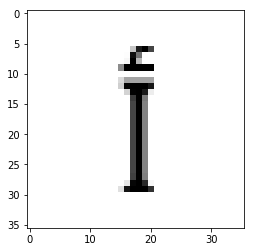

In [172]:
show_image(resize_font_img(char_to_font_img(arabic_reshaper.reshape("أ"),FONT)))

(36, 36)
[0. 0. 0. ... 0. 0. 0.]


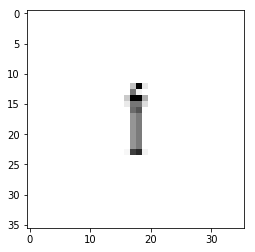

In [173]:
show_image(char_imge)

In [174]:
char_images = [draw_image(x,image_width, image_height, fnt ) for x in m_sentence_set]

(36, 36)
[0. 0. 0. ... 0. 0. 0.]


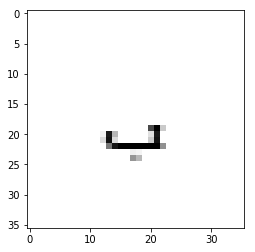

In [175]:
show_image(char_images[3])

In [176]:
np.max(char_imge)

1.0

In [177]:
np.min(char_imge)

0.0

In [178]:
np.unique(char_imge)

array([0.        , 0.00784314, 0.0627451 , 0.10588235, 0.11372549,
       0.15686275, 0.17254902, 0.21960784, 0.31372549, 0.35294118,
       0.42352941, 0.50196078, 0.59607843, 0.61176471, 0.61960784,
       0.65098039, 0.7372549 , 0.80392157, 0.8627451 , 0.98823529,
       1.        ])

In [179]:
img_tensors = torch.stack([torch.cuda.FloatTensor(np.asarray(char_images, dtype=np.float32))])

In [180]:
img_tensors.shape

torch.Size([1, 108, 36, 36])

In [181]:
encoded_images = model.module.encoder(img_tensors)

In [182]:
encoded_images.shape

torch.Size([1, 128, 108])

In [183]:
encoded_images

tensor([[[0.0606, 0.0430, 0.0000,  ..., 0.0000, 0.0601, 0.1038],
         [0.0263, 0.0000, 0.0000,  ..., 0.0000, 0.0829, 0.0430],
         [0.0214, 0.1342, 0.0450,  ..., 0.0000, 0.0666, 0.0456],
         ...,
         [0.1434, 0.1432, 0.0000,  ..., 0.0325, 0.0000, 0.0660],
         [0.1189, 0.0000, 0.0000,  ..., 0.0174, 0.0044, 0.0000],
         [0.0000, 0.1639, 0.0148,  ..., 0.0000, 0.0076, 0.0000]]],
       device='cuda:0', grad_fn=<ViewBackward>)

In [184]:
encoded_images = np.reshape(encoded_images.cpu().detach().numpy(), (encoded_images.shape[-1], encoded_images.shape[-2]))


In [185]:
encoded_images.shape

(108, 128)

In [190]:
knn = NearestNeighbors(n_neighbors=4, n_jobs=4)
knn.fit(encoded_images)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=4, n_neighbors=4, p=2, radius=1.0)

In [191]:
dist, indices = knn.kneighbors(encoded_images)


In [192]:
characters = list(m_sentence_set)

In [200]:
target_character = 'ﺪ'
neighbors = [(characters[idx], dist[characters.index(target_character)][i]) for i, idx in enumerate(indices[characters.index(target_character)])]
pprint(neighbors)


[('ﺪ', 0.0),
 ('ﺩ', 0.03312777796675393),
 ('ﺫ', 0.03800257889383024),
 ('ﺬ', 0.03931428337775784)]


In [216]:
len(tsne_chars)

108

In [204]:
tsne = TSNE(n_components=2, random_state=114514)
tsne_chars = tsne.fit_transform(encoded_images)


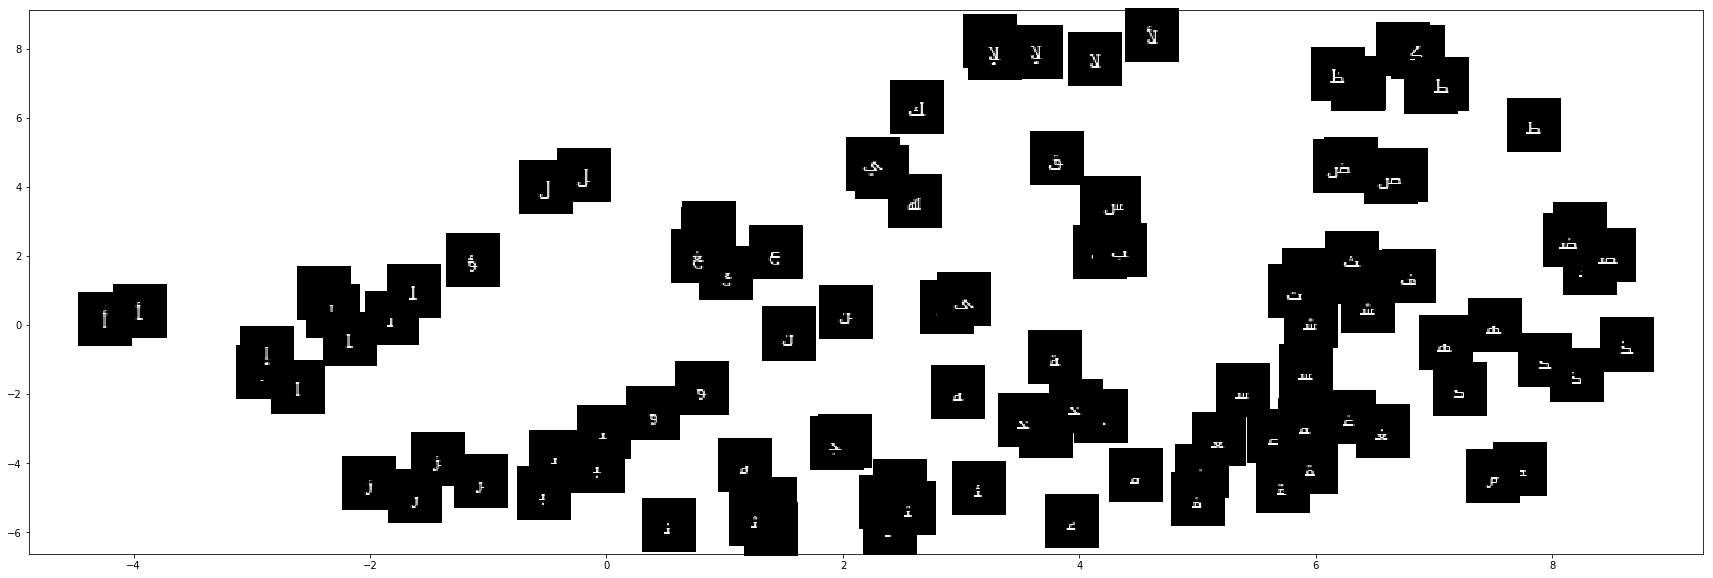

In [229]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 1, 1)

for convert_char, (x, y) in zip(char_images, tsne_chars):
    im = OffsetImage(convert_char, zoom=1.5, cmap="gray")
    ab = AnnotationBbox(im, (x, y), xycoords="data", frameon=False)
    ax.add_artist(ab)
    x, y = np.atleast_1d(x, y)
    ax.update_datalim(np.column_stack([x, y]))
ax.autoscale()

plt.savefig("test.png")
